In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel(r'C:\Users\Rafael\Downloads\airfoil_data_to_derivate.xlsx')

In [8]:
x = np.linspace(0, 1, 150)

In [21]:
def cartesian_to_polar(df, x):
    polar_data = {"AIRFOIL_NAME": df["AIRFOIL_NAME"].values}
    
    for i in range(len(x)):
        y_upper = df[f"y_upper_{i}"].values
        y_lower = df[f"y_lower_{i}"].values
        
        r_upper = np.sqrt(x[i]**2 + y_upper**2)
        theta_upper = np.arctan2(y_upper, x[i])
        
        r_lower = np.sqrt(x[i]**2 + y_lower**2)
        theta_lower = np.arctan2(y_lower, x[i])
        
        polar_data[f"r_upper_{i}"] = r_upper
        polar_data[f"theta_upper_{i}"] = theta_upper
        polar_data[f"r_lower_{i}"] = r_lower
        polar_data[f"theta_lower_{i}"] = theta_lower
    
    return pd.DataFrame(polar_data)

df_polar = cartesian_to_polar(df, x)

In [22]:
df_polar

,AIRFOIL_NAME,r_upper_0,theta_upper_0,r_lower_0,theta_lower_0,r_upper_1,theta_upper_1,r_lower_1,theta_lower_1,r_upper_2,...,r_lower_147,theta_lower_147,r_upper_148,theta_upper_148,r_lower_148,theta_lower_148,r_upper_149,theta_upper_149,r_lower_149,theta_lower_149
0,2032c,0.0,0.0,0.0,0.0,0.012346,0.996062,0.007228,-0.380506,0.024266,...,0.986577,0.000011,0.993293,0.003070,0.993289,-0.000800,1.000001,0.001600,1.000001,-0.001600
1,a18,0.0,0.0,0.0,0.0,0.026879,1.318432,0.014479,1.088833,0.035545,...,0.986578,0.001181,0.993319,0.007807,0.993289,0.000586,1.000019,0.006140,1.000000,0.000000
2,a18sm,0.0,0.0,0.0,0.0,0.012231,0.989983,0.010629,-0.887427,0.020243,...,0.986580,-0.002291,0.993300,0.004707,0.993292,-0.002689,1.000005,0.003070,1.000005,-0.003060
3,a63a108c,0.0,0.0,0.0,0.0,0.015933,1.136003,0.012471,-1.002528,0.022979,...,0.986577,-0.000799,0.993313,0.007082,0.993289,-0.000395,1.000024,0.007000,1.000000,0.000000
4,ag03,0.0,0.0,0.0,0.0,0.012541,1.006117,0.008459,-0.654482,0.020514,...,0.986577,-0.000753,0.993290,0.001385,0.993289,-0.000651,1.000000,0.000662,1.000000,-0.000548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,wb140,0.0,0.0,0.0,0.0,0.012099,0.982794,0.009878,-0.823841,0.023740,...,0.986582,-0.003214,0.993297,0.004172,0.993293,-0.002855,1.000003,0.002500,1.000003,-0.002500
1508,whitcomb,0.0,0.0,0.0,0.0,0.017120,1.167964,0.017120,-1.167964,0.025729,...,0.986581,0.002655,0.993290,0.001411,0.993289,0.000664,1.000000,-0.000800,1.000001,-0.001300
1509,ys900,0.0,0.0,0.0,0.0,0.007948,0.565237,0.007948,-0.565237,0.014966,...,0.986579,-0.001917,0.993289,0.000730,0.993289,-0.000730,1.000000,0.000000,1.000000,0.000000
1510,ys915,0.0,0.0,0.0,0.0,0.009276,0.761883,0.009009,-0.730331,0.016491,...,0.986577,-0.000581,0.993289,0.001034,0.993289,-0.000142,1.000000,0.000000,1.000000,0.000000


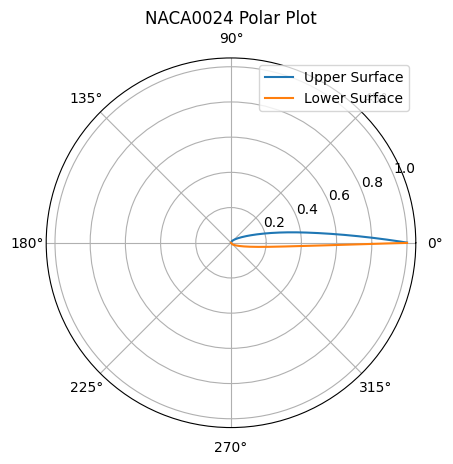

In [31]:
# Filter out NACA0048
naca0048 = df_polar[df_polar["AIRFOIL_NAME"] == "naca2408"].iloc[0]

# Get polar coordinates
r_upper = [naca0048[f"r_upper_{i}"] for i in range(150)]
theta_upper = [naca0048[f"theta_upper_{i}"] for i in range(150)]

r_lower = [naca0048[f"r_lower_{i}"] for i in range(150)]
theta_lower = [naca0048[f"theta_lower_{i}"] for i in range(150)]

# Plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta_upper, r_upper, label="Upper Surface")
ax.plot(theta_lower, r_lower, label="Lower Surface")
ax.set_title("NACA0024 Polar Plot")
ax.legend()

plt.show()

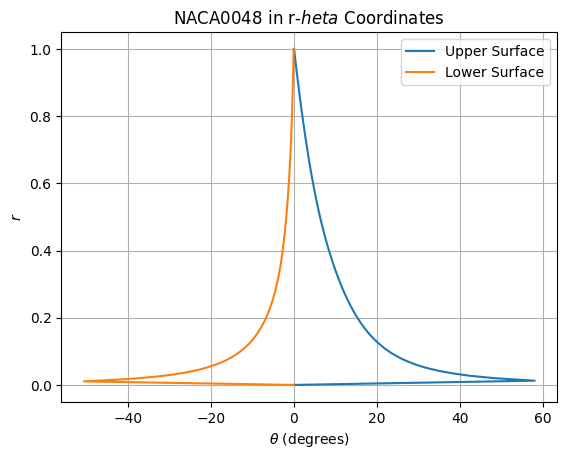

In [32]:
# Plot
fig, ax = plt.subplots()

# Convert theta from radians to degrees for labeling and understanding
theta_upper_deg = [theta * 180 / 3.14159 for theta in theta_upper]
theta_lower_deg = [theta * 180 / 3.14159 for theta in theta_lower]

ax.plot(theta_upper_deg, r_upper, label="Upper Surface")
ax.plot(theta_lower_deg, r_lower, label="Lower Surface")

ax.set_xlabel(r"$\theta$ (degrees)")
ax.set_ylabel(r"$r$")
ax.set_title("NACA0048 in r-$\theta$ Coordinates")
ax.grid(True)
ax.legend()

plt.show()






In [33]:
df_polar.to_excel("polar_coordinates.xlsx", index=False, engine='openpyxl')